In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-dataset/train-images.idx3-ubyte
/kaggle/input/mnist-dataset/t10k-labels.idx1-ubyte
/kaggle/input/mnist-dataset/t10k-images.idx3-ubyte
/kaggle/input/mnist-dataset/train-labels.idx1-ubyte
/kaggle/input/mnist-dataset/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte
/kaggle/input/mnist-dataset/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte
/kaggle/input/mnist-dataset/train-labels-idx1-ubyte/train-labels-idx1-ubyte
/kaggle/input/mnist-dataset/train-images-idx3-ubyte/train-images-idx3-ubyte


# Goals

***Our goal is to build and train a neural network, which recognizes handwritten digits with a mind-blowing accuracy. It will be able to recognize the digits from 0 to 9***

# Importing Libraries

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

* ***tensorflow - Used for model and to train our network***
* ***numpy - Used for reformatting***
* ***matplotlib.pyplot - Used for visualization***
* ***cv - Used for fitting image***

# Loading and Preparing Data

* ***MNIST dataset contains 60,000 training examples and 10,000 testing examples of handwritten digits that are already classified correctly***
* ***These images have a resolution of 28x28 pixels.***
* ***We will use the keras module to load the dataset.***
* ***we call the load_function dataset. This function automatically splits the data appropriately and returns a tuple with the training data and a tuple with the testing data.***

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
print('Training Input Shape:', X_train.shape)
print('Training Lables Shape:',y_train.shape)
print('Testing Input Shape:',X_test.shape)
print('Testing Label Shape:',y_test.shape)

Training Input Shape: (60000, 28, 28)
Training Lables Shape: (60000,)
Testing Input Shape: (10000, 28, 28)
Testing Label Shape: (10000,)


# Visualization the data 

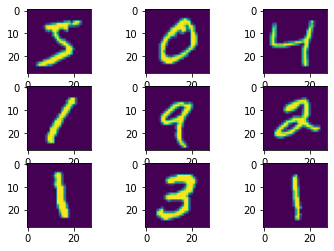

In [5]:
fig, axs = plt.subplots(3, 3)
cnt = 0
for i in range(3):
     for j in range(3):
         axs[i, j].imshow(X_train[cnt])
         cnt += 1

# Normalize Data

* ***In order to make the whole data easier to process, we are going to normalize it. This means that we scale down all the values so that they end up between 0 and 1.***

* ***For this we use the normalize function of keras.uitils.***

In [6]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

# Neural Network Building

**We use the models module from keras to create a new neural network. The Sequential constructor does this for us.**

In [7]:
model = tf.keras.models.Sequential()

2022-10-20 12:28:44.643520: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


**Now we have a model, which doesn't have any layers in it. Those have to be added manually.**

In [8]:
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))    #input Layer

* **We start out by adding a so-called Flatten layer as our first layer.**
* **In order to add a layer to our model, we use the add function. Then we can choose the kind of layer that we want from the layers module.**
* **We specified an input shape of 28x28 which represents the resolution of images.**
* **What a flattened layer basically does is it flattens the input and makes it one dimensional. So instead of a 28x28 grid, we end up with 784 neurons lined up.**

In [9]:
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))   # 1st hidden layer
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))   # 2nd hidden layer

* **We added two dense layers. These are our hidden layers and increase the complexity of our model.**
* **Both layers have 128 neurons each.**
* **The activation function is ReLU function.**
* **Dense layers connect every neuron of this layer with all the neurons of the next and previous layer.**

In [10]:
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))   # output layer

* **Last but not least we add an output layer. This one is also a dense layer but it only has 10 neurons and a different activation function.**
* **The values of the 10 neurons indicate how much our model believes that the respective number is the right classification.**
* **The first neuron is for the zero, the second for the one and so on.**
* **The activation function that we use here is the softmax function. This function scales the output values so that they all add upto one. Thus it transforms the absolute values into relative values.-**

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# Model Compiling

* **Before we start training and testing our model, we need to compile it first. This optimizes it and we can also choose a loss function.**
* **An optimizer is a function or an algorithm that modifies the attributes of the neural network, such as weights and learning rate. Thus, it helps in reducing the overall loss and improve the accuracy.**

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training and Testing

* **Now, we get to the essential part of the whole project - the training and testing.**

* **For this, we just have to use the fit function of our model.**

* **epochs - This number defines how many times our model is going to see the same data over and over again.**

* **batch_size - This refers to the number of training examples utilized in one iteration.**

In [13]:
model.fit(X_train, y_train, epochs=10, batch_size=100)

2022-10-20 12:28:45.443844: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
600/600 [==============================] - 3s 4ms/step - loss: 0.3453 - accuracy: 0.9036
Epoch 2/10
600/600 [==============================] - 2s 4ms/step - loss: 0.1405 - accuracy: 0.9576
Epoch 3/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0961 - accuracy: 0.9707
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0721 - accuracy: 0.9775
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0557 - accuracy: 0.9828
Epoch 6/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0430 - accuracy: 0.9862
Epoch 7/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0336 - accuracy: 0.9892
Epoch 8/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0264 - accuracy: 0.9917
Epoch 9/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0213 - accuracy: 0.9932
Epoch 10/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0179 - accuracy: 0.9942

# Model Evalution

In [14]:
loss, accuracy = model.evaluate(X_test, y_test)
print(loss)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0924 - accuracy: 0.9742
0.09242131561040878
0.9742000102996826


# Prediction

In [15]:
prediction = model.predict([X_test])
prediction

array([[4.7008578e-11, 5.0526042e-11, 4.0836508e-09, ..., 9.9999821e-01,
        2.6381168e-13, 1.6579496e-10],
       [3.2271307e-11, 4.9552950e-06, 9.9999499e-01, ..., 8.3134208e-11,
        1.1867191e-12, 6.0984261e-17],
       [1.5437851e-10, 9.9999249e-01, 3.6846664e-08, ..., 2.8728032e-06,
        4.2732731e-06, 3.5967548e-10],
       ...,
       [1.2815938e-13, 2.9345268e-09, 1.6981987e-13, ..., 1.6821353e-07,
        8.4470334e-11, 4.7395181e-07],
       [5.0481237e-09, 2.1566551e-09, 2.0395493e-12, ..., 4.6471182e-09,
        7.4049075e-07, 1.3076451e-14],
       [1.4660558e-09, 4.0506187e-10, 4.5962101e-09, ..., 1.2898908e-14,
        4.1597886e-13, 1.8972945e-15]], dtype=float32)

* **This prediction consists of the ten activations or probabilities from the output neurons.**
* **Since we need to generate a result out of that, we are going to use the argmax function. This function returns the index of the highest value.**
* **In this case this is equivalent to the digit with the highest probability or activation.**

In [16]:
print('Probabilities: ', prediction[10])
print('\n')
print('Prediction: ', np.argmax(prediction[10]))

Probabilities:  [9.9999833e-01 1.0374537e-09 1.4604855e-08 3.6355050e-13 3.3456961e-14
 2.6540723e-08 1.6643868e-06 1.0036932e-09 6.9890536e-16 1.2850520e-08]


Prediction:  0


In [17]:
hits=faults=0
for i in range(len(prediction)):
    if(np.argmax(prediction[i])==y_test[i]):
        hits+=1
hits = (hits / len(y_test)) * 100
faults=100-hits

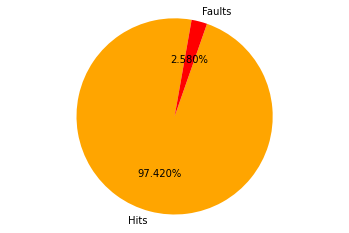

In [18]:
graph=[hits,faults]
labels = 'Hits', 'Faults';
sizes = [90.0, 10.0]
explode = (0, 0.24)

fig1, ax1 = plt.subplots();
ax1.pie(graph,colors=['orange','red'],labels=labels, autopct='%1.3f%%',startangle=80)
ax1.axis('equal')
plt.show()

# visualize the image

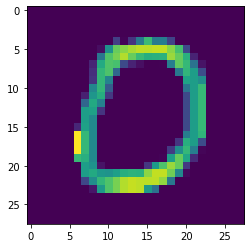

In [19]:
plt.imshow(X_test[10])
plt.show()

**Hence my model performs with an accuracy of 97%**